In [ ]:
!pip install shap scikit-learn torch


Using device: cpu
Model loaded from: iris_model.pt


<ipython-input-5-3821994427>:81: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:5], feature_names=iris['feature_names'])
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages

<Figure size 640x480 with 0 Axes>

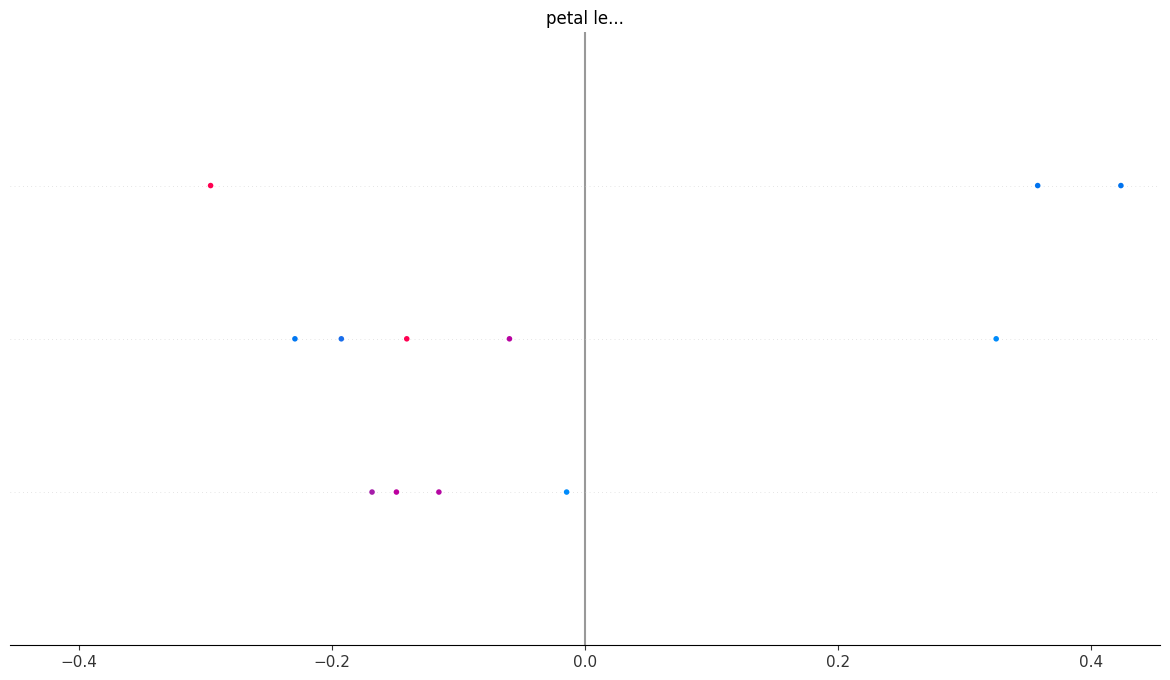

In [5]:
import shap
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

iris = load_iris()
X = iris['data']
y = iris['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# --- 2. Define the model ---
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 3)  # 3 output classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.softmax(self.fc3(x), dim=1)

model = IrisNet().to(device)

# --- 3. Train or Load Model ---
model_path = "iris_model.pt"

if not os.path.exists(model_path):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(50):
        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

    torch.save(model.state_dict(), model_path)
    print("Model saved to:", model_path)
else:
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    print("Model loaded from:", model_path)


model_cpu = model.to("cpu")
X_train_cpu = X_train_tensor.to("cpu")
X_test_cpu = X_test_tensor.to("cpu")

explainer = shap.GradientExplainer(model_cpu, X_train_cpu[:50])
shap_values = explainer.shap_values(X_test_cpu[:5])


shap.summary_plot(shap_values, X_test[:5], feature_names=iris['feature_names'])


Using device: cpu
Epoch 1: Loss = 1.0646, Accuracy = 0.6167
Epoch 2: Loss = 0.9369, Accuracy = 0.8000
Epoch 3: Loss = 0.7966, Accuracy = 0.8000
Epoch 4: Loss = 0.7418, Accuracy = 0.8250
Epoch 5: Loss = 0.7022, Accuracy = 0.8583
Epoch 6: Loss = 0.6854, Accuracy = 0.8667
Epoch 7: Loss = 0.6612, Accuracy = 0.9083
Epoch 8: Loss = 0.6439, Accuracy = 0.9417
Epoch 9: Loss = 0.6197, Accuracy = 0.9333
Epoch 10: Loss = 0.6039, Accuracy = 0.9500
Epoch 11: Loss = 0.5953, Accuracy = 0.9667
Epoch 12: Loss = 0.5861, Accuracy = 0.9667
Epoch 13: Loss = 0.5850, Accuracy = 0.9583
Epoch 14: Loss = 0.5877, Accuracy = 0.9667
Epoch 15: Loss = 0.5819, Accuracy = 0.9667
Epoch 16: Loss = 0.5810, Accuracy = 0.9667
Epoch 17: Loss = 0.5796, Accuracy = 0.9667
Epoch 18: Loss = 0.5782, Accuracy = 0.9667
Epoch 19: Loss = 0.5769, Accuracy = 0.9750
Epoch 20: Loss = 0.5767, Accuracy = 0.9750
Epoch 21: Loss = 0.5810, Accuracy = 0.9667
Epoch 22: Loss = 0.5857, Accuracy = 0.9750
Epoch 23: Loss = 0.5746, Accuracy = 0.9833
Ep

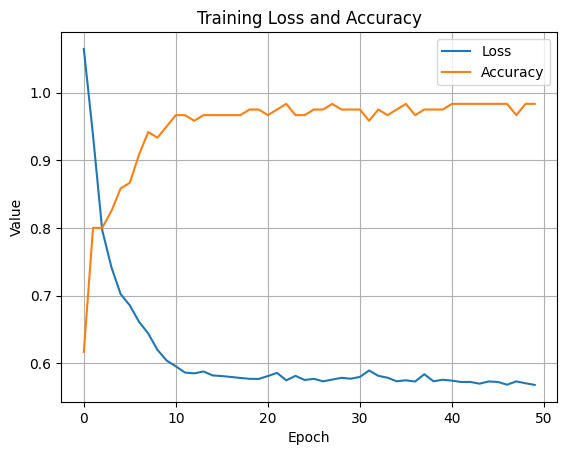

<ipython-input-7-2380118476>:111: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:5], feature_names=iris['feature_names'])
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:726: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:746: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-package

<Figure size 640x480 with 0 Axes>

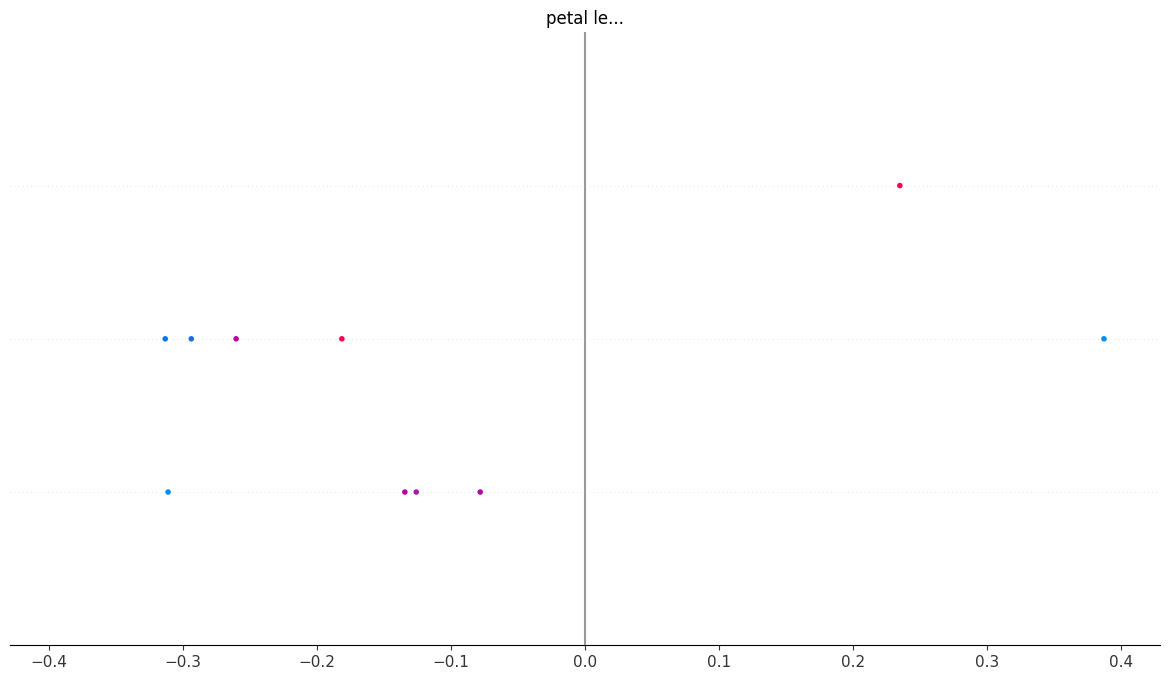

In [7]:
import shap
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import os


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


iris = load_iris()
X = iris['data']
y = iris['target']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 16)
        self.fc2 = nn.Linear(16, 16)
        self.fc3 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return F.softmax(self.fc3(x), dim=1)

model = IrisNet().to(device)

model_path = "iris_model.pt"
losses = []
accuracies = []

if not os.path.exists(model_path):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(50):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for xb, yb in train_loader:
            optimizer.zero_grad()
            preds = model(xb)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(preds, 1)
            correct += (predicted == yb).sum().item()
            total += yb.size(0)

        epoch_loss = total_loss / len(train_loader)
        epoch_acc = correct / total
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        print(f"Epoch {epoch+1}: Loss = {epoch_loss:.4f}, Accuracy = {epoch_acc:.4f}")

    torch.save(model.state_dict(), model_path)
    print("Model saved to:", model_path)
else:
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.eval()
    print("Model loaded from:", model_path)

if losses and accuracies:
    plt.figure()
    plt.plot(losses, label="Loss")
    plt.plot(accuracies, label="Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Training Loss and Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

model_cpu = model.to("cpu")
X_train_cpu = X_train_tensor.to("cpu")
X_test_cpu = X_test_tensor.to("cpu")

explainer = shap.GradientExplainer(model_cpu, X_train_cpu[:50])
shap_values = explainer.shap_values(X_test_cpu[:5])


shap.summary_plot(shap_values, X_test[:5], feature_names=iris['feature_names'])
